### (1)Mode简介
#### Transformer
    - 原始的Transformer为编码器（Encoder）、解码器（Decode）模型
    - Encode部分接收输入并构建其完整特征表示，Decoder部分使用Encoder的编码结果以及其他的输入生成目标序列
    - 无论是编码器还是解码器，均由多个TransformerBlock堆叠而成
    - TransformerBlock由注意力机制（Attention）和FFN组成
- 注意力机制
    - 注意力机制的使用是Transformer的一个核心特性，在计算当前词的特征表示时，可以通过注意力机制有选择性的告诉模型要使用哪些上下文

#### Transformer结构
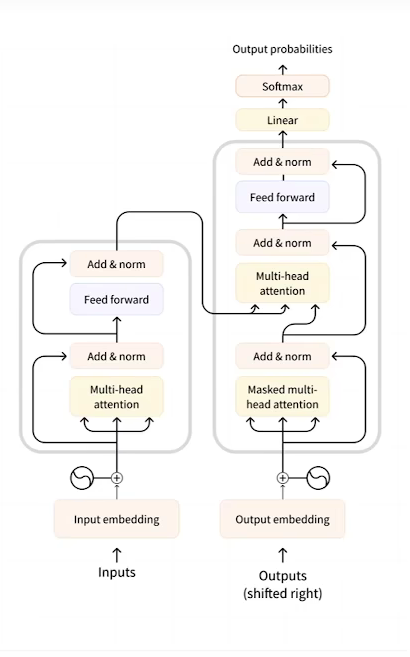

#### 模型类型
    - 编码器模型：自编码模型，使用Encoder,拥有双向的注意力机制，即计算每一个词的特征时都看完整上下文。
    - 解码器模型：自回归模型，使用Decoder,拥有单向的注意力机制，即计算每一个词的特征时都只能看到上文，无法看到下午
    - 编码器解码器模型：序列到序列模型，使用Encoder+Decoder,Encoder部分使用双向的注意力，Decoder部分使用单项注意力

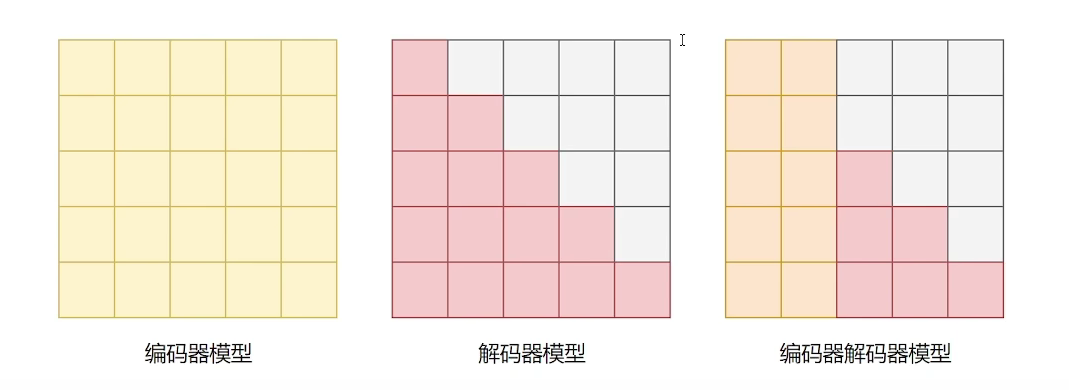
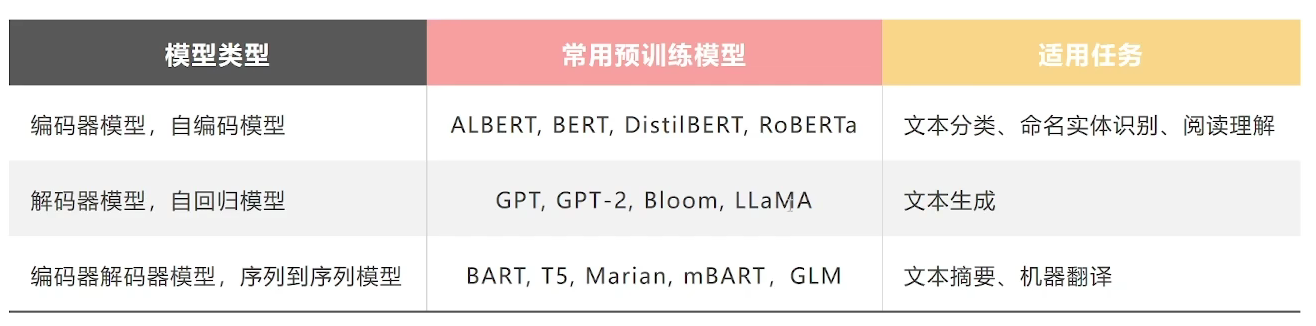

### (2)Model Head
#### 什么是Model Head
    - Model Head是连接在模型后的层，通常为1个或多个全连接层
    - Model Head将模型的编码的表示结果进行映射，以解决不同类型的任务
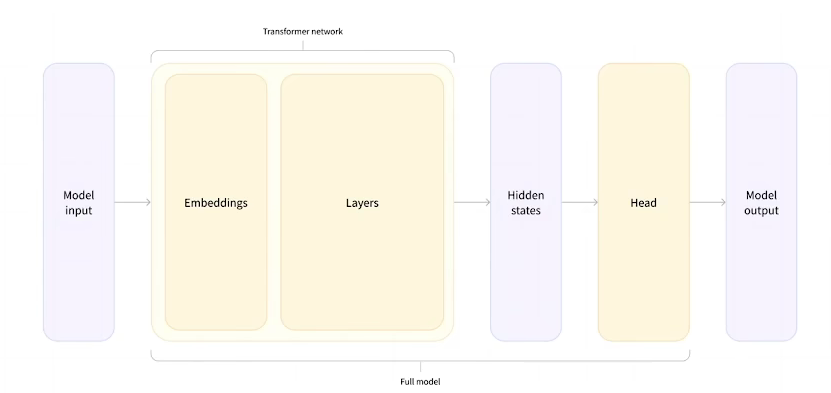

#### Transformers中的Model Head
    - Model(模型本身，只返回编码结果)
    - ForCausalLM
    - ForMaskedLM
    - ForSeq2SeqLM
    - ForMultipleChoice
    - ForQuestionAnswering
    - ForSequenceClassification
    - ForTokenClassification
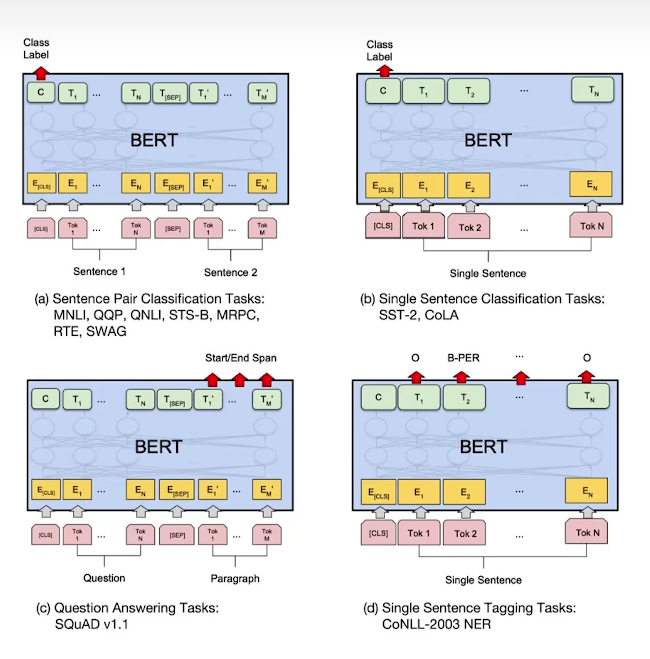

### (3)Model 基本使用方法
- 模型加载与保存
    - 在线加载
    - 模型下载
    - 离线加载
    - 模型加载参数
- 模型调用
    - 不带model head的模型调用
    - 带model head的模型调用

#### 模型加载与保存

In [1]:
from transformers import AutoConfig,AutoModel,AutoTokenizer

c:\Users\ningmeng\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### 在线加载

In [ ]:
model=AutoModel.from_pretrained('hfl/rbt3',force_download=True)

##### 模型下载

In [ ]:
!git clone 'https://huggingface.co/hf1/rbt3'

In [ ]:
!git lfs clone "https://huggingface.co/hf1/rbt3" --include="*.bin"

##### 离线加载

In [2]:
model=AutoModel.from_pretrained('./rbt3')

##### 模型加载参数

In [3]:
model=AutoModel.from_pretrained('rbt3')

In [4]:
model.config

BertConfig {
  "_name_or_path": "rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [5]:
config=AutoConfig.from_pretrained('rbt3')
config

BertConfig {
  "_name_or_path": "rbt3",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 3,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [6]:
config.add_cross_attention

False

In [7]:
from transformers import BertConfig

#### 模型调用

In [8]:
sen='弱小的我也有大梦想'
tokenizer=AutoTokenizer.from_pretrained('rbt3')
inputs=tokenizer(sen,return_tensors='pt')
inputs

{'input_ids': tensor([[ 101, 2483, 2207, 4638, 2769,  738, 3300, 1920, 3457, 2682,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

##### 不带Model Head的模型调用

In [9]:
model=AutoModel.from_pretrained('rbt3',output_attentions=True)

In [10]:
output=model(**inputs)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.2872,  0.5480,  0.3357,  ..., -0.3296,  0.0717, -0.1080],
         [-0.8537, -0.3002,  0.4380,  ...,  0.0510, -0.4261, -0.6406],
         [-0.1367,  0.6865,  0.1021,  ..., -0.3336,  0.4131, -0.5922],
         ...,
         [-0.0061,  0.2498,  0.7738,  ..., -0.1544, -0.4102, -0.4334],
         [ 0.1017,  0.5554, -0.3440,  ..., -0.1113,  0.3610,  0.2782],
         [ 0.2811,  0.5505,  0.3344,  ..., -0.3255,  0.0713, -0.1040]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[ 6.4033e-03, -9.9755e-01, -9.9986e-01, -8.0316e-01,  8.9692e-01,
         -1.0432e-01,  1.7788e-01, -7.0320e-03,  9.9760e-01,  9.9925e-01,
          7.8582e-02, -1.0000e+00,  7.1476e-02,  9.9982e-01, -9.9997e-01,
          9.9974e-01,  9.9521e-01,  8.9890e-01, -9.9948e-01, -1.6133e-01,
         -9.9497e-01, -9.5804e-01,  1.9115e-01,  9.4259e-01,  9.9322e-01,
         -9.9596e-01, -9.9983e-01,  1.7319e-01, -7.7147e-01, -9.988

In [ ]:
output.last_hidden_state.size()

In [ ]:
len(inputs['input_ids'][0])

##### 带Model Head的模型调用

In [ ]:
from transformers import AutoModelForSequenceClassification,BertForSequenceClassification

In [ ]:
# num_labels是类别数，默认为2
clz_model=AutoModelForSequenceClassification.from_pretrained('rbt3',num_labels=10)
clz_model(**tokenizer(sen,return_tensors='pt'))

In [ ]:
clz_model.config.num_labels

### (4) 模型微调代码实例
- 任务类型
    - 文本分类
- 使用模型
    - hfl/rbt3
- 数据集
    - https://github.com/SophonPlus/ChineseNlpCorpus

#### 文本分类实列

##### Step1 导入相关包

In [1]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch
from torch.optim import Adam

c:\Users\ningmeng\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Step2 加载数据

In [ ]:
data=pd.read_csv('./ChnSentiCorp_htl_all.csv')
print(data.info())
data.head(5)

In [ ]:
# 删除空数据
data=data.dropna()
data.info()

##### Step3 创建Dataset

In [ ]:
class MyDataset(Dataset):
    def __init__(self):
        super().__init__()
        self.data=pd.read_csv('./ChnSentiCorp_htl_all.csv')
        self.data=self.data.dropna()
    def __getitem__(self, index):
        return self.data.iloc[index]['review'],self.data.iloc[index]['label']
    def __len__(self):
        return len(self.data)
    

In [ ]:
dataset=MyDataset()
for i in range(5):
    print(dataset[i])

In [ ]:
dataset

##### Step4 划分数据集

In [ ]:
trainset,validset=random_split(dataset,lengths=[0.9,0.1])
len(trainset),len(validset)

##### Step5 创建Dataloader

In [ ]:
tokenizer=AutoTokenizer.from_pretrained('rbt3')

def collate_func(batch):
    texts, labels = [], []
    for item in batch:
        texts.append(item[0])
        labels.append(item[1])
    inputs = tokenizer(texts, max_length=128, padding="max_length", truncation=True, return_tensors="pt")
    inputs["labels"] = torch.tensor(labels)
    return inputs


In [ ]:
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, collate_fn=collate_func)
validloader = DataLoader(validset, batch_size=64, shuffle=False, collate_fn=collate_func)

In [ ]:
next(enumerate(trainloader))[1]

##### Step6创建模型及优化器

In [ ]:
model=AutoModelForSequenceClassification.from_pretrained('rbt3')

if torch.cuda.is_available():
    model=model.cuda()


In [ ]:
# 返回模型中所有需要学习的参数
model.parameters()

In [ ]:
optimizer=Adam(model.parameters(),lr=2e-5)

##### Step7 训练与验证

在Python中，*和**是用来解包参数的运算符。    
*用于解包可迭代对象（如列表、元组），将其元素作为位置参数传递给函数或方法。    
**用于解包字典，将其键值对作为关键字参数传递给函数或方法。    

如果batch = {    
    'input_data': input_tensor,    
    'target_data': target_tensor    
}    
那么解包后为8model(input_data=input_tensor, target_data=target_tensor)


In [ ]:
def evaluate():
    model.eval()
    acc_num = 0
    with torch.inference_mode():
        for batch in validloader:
            if torch.cuda.is_available():
                batch = {k: v.cuda() for k, v in batch.items()}
            output = model(**batch)
            pred = torch.argmax(output.logits, dim=-1)
            acc_num += (pred.long() == batch["labels"].long()).float().sum()
    return acc_num / len(validset)

def train(epoch=2, log_step=100):
    global_step = 0
    for ep in range(epoch):
        model.train()
        for batch in trainloader:
            batch = {k: v for k, v in batch.items()}
            optimizer.zero_grad()
            output = model(**batch)
            output.loss.backward()
            optimizer.step()
            if global_step % log_step == 0:
                print(f"ep: {ep}, global_step: {global_step}, loss: {output.loss.item()}")
            global_step += 1
        acc = evaluate()
        print(f"ep: {ep}, acc: {acc}")

##### Step8 模型训练

In [ ]:
train()

##### Step9 模型预测

In [ ]:
sen='我觉得这家酒店不错，饭很好吃'
id2_label={0:'差评',1:'好评'}
with torch.inference_mode():
    inputs=tokenizer(sen,return_tensors='pt')
    inputs={k:v for k,v in inputs.items()}
    logits=model(**inputs).logits
    pred=torch.argmax(logits,dim=-1)
    print(f"输入：{sen}\n模型预测结果：{id2_label.get(pred.item())}")


In [ ]:
from transformers import pipeline

model.config.id2label=id2_label
pipe=pipeline('text-classification',model=model,tokenizer=tokenizer)

In [ ]:
pipe(sen)